In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
acoes = {
    # AGRO
    'acao1': 'CCRO3.SA',
    'acao2': 'AGRO3.SA',
    'acao3': 'VALE3.SA',
    'acao4': 'SMTO3.SA',
    'acao5': 'BRFS3.SA',
    
    # BANCARIO
    'acao6': 'BBAS3.SA',
    'acao7': 'ITUB4.SA',
    'acao8': 'BBDC4.SA',
    'acao9': 'SANB11.SA',
    'acao10': 'PETR4.SA',
    
    # TRANSPORTE
    'acao11': 'GOLL4.SA',
    'acao12': 'AZUL4.SA',
    'acao13': 'RAIL3.SA',
    'acao14': 'SLCE3.SA',
    'acao15': 'JSLG3.SA',
    
    # TECNOLOGICO
    'acao16': 'TOTS3.SA',
    'acao17': 'IGTI11.SA',
    'acao18': 'POSI3.SA',
    'acao19': 'LWSA3.SA',
    'acao20': 'BMOB3.SA'
}

In [32]:
tickers = {}
for k, val in acoes.items():
    tickers[k] = yf.Ticker(val).history(period='1y')

In [33]:
std_ = {}
for k, df in tickers.items():
    std_[k] = df["Close"].std()

min(std_, key=std_.get)

'acao1'

In [34]:
def numero_acoes(df, investimento_inicial):
    return investimento_inicial/df.iloc[0]['Close']

def retorno_total(df):
    return df.iloc[-1]['Valor Investido']/df.iloc[0]['Valor Investido'] - 1

def sharpee(df, cols=None):
    return retorno_total(df)/df['Valor Investido'].pct_change().std()

In [35]:
investimento_inicial = 1000
n_acoes = {}
for k, val in tickers.items():
    n_acoes[k] = numero_acoes(val, investimento_inicial)
    tickers[k]['Valor Investido'] = n_acoes[k] * tickers[k]['Close']

In [36]:
retornos = pd.DataFrame(dict((k, val['Valor Investido'].pct_change()) for k, val in tickers.items()))
retornos.drop(retornos.iloc[:,0].index[0], inplace=True)

In [37]:
indices_sharpee = pd.DataFrame()
portifolio = pd.DataFrame()
acoes_p = ['acao1']

for _ in range(4):
    try:
        portifolio['Valor Investido'] += tickers[acoes_p[-1]]['Valor Investido']
    except KeyError:
        portifolio['Valor Investido'] = tickers[acoes_p[-1]]['Valor Investido']

    portifolio['Valor Investido pct'] = portifolio['Valor Investido'].pct_change()

    if acoes_p[-1] not in portifolio.columns:
        portifolio[acoes_p[-1]] = retornos[acoes_p[-1]]
    
    retornos['portifolio'] = portifolio['Valor Investido pct']

    correlacoes = retornos.corr()

    indices_sharpee[', '.join([acoes[k] for k in acoes_p])] = portifolio['Valor Investido']

    acoes_p += [correlacoes['portifolio'].idxmin()]

In [38]:
def sharpee_port(vals):
    return (vals[-1]/vals[0] - 1)/vals.pct_change().std()

C:\Users\henri\AppData\Local\Temp\ipykernel_16908\2749666665.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (vals[-1]/vals[0] - 1)/vals.pct_change().std()


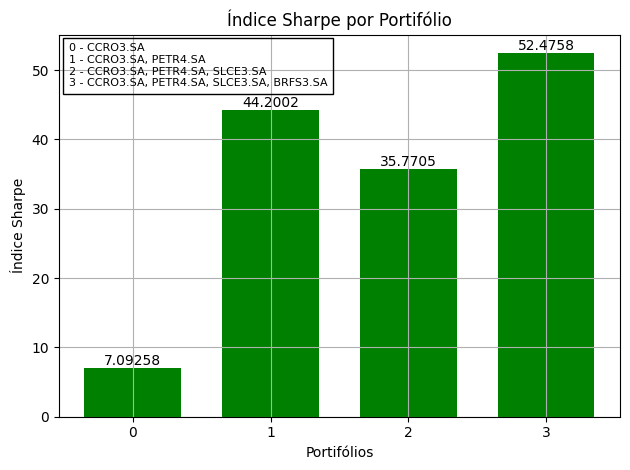

In [78]:
labels = indices_sharpee.columns

fig, ax = plt.subplots()
bars = ax.bar(range(4), indices_sharpee.apply(sharpee_port), width=0.7, color='g')
ax.set_xticks(range(4))

x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(range(4), labels))

t = ax.text(0.115,.81, x_legend, fontsize=8, transform=ax.figure.transFigure, bbox={'facecolor': 'none', 'edgecolor' : 'black'})
ax.bar_label(bars)

plt.title('Índice Sharpe por Portifólio')
plt.ylabel('Índice Sharpe')
plt.xlabel('Portifólios')
plt.tight_layout()
plt.grid()